<p><a name="INTRO"></a></p>
# MATCHING ALGORITHM DEMONSTRATION

- <a href="#packages">Load packages</a><br>
- <a href="#data">Load Cleaned Data into Python</a><br>
- <a href="#sample">Sample Input</a><br>
- <a href="#matching intialization">Load Data into Matching Algorithm</a><br>
- <a href="#algorithm">Default Algorithm</a><br>
- <a href="#Parameters">Tuning Parameters</a><br>
- <a href="#matrix">Table of all matches</a><br>
- <a href="#conclusion">Conclusion</a><br>

<p><a name="packages"></a></p>
### Load Packages

Load necessary packages to run algorithm





In [1]:
import BBGMatching
import pandas as pd
import numpy as np
import collections
import re
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
import time

<p><a name="data"></a></p>
### Load Cleaned Data into Python
Make sure the notebook is in the same folder as the files from the cleaning script. Then load the data into python by writing the file pathname with the extension(.csv) in parentheses

In [2]:
users_students_input = pd.read_csv('users_students_input.csv')
users_prof_input = pd.read_csv('users_prof_input.csv')
matches_input=pd.read_csv('matches_input.csv')


<font color = Red> **BELOW IS CODE JUST ADDITIONAL CODE TO RUN THE SAMPLE DEMONSTRATION**</font>


In [3]:
matches_test = matches_input.loc[matches_input['wave_number']==4]
users_students_test = pd.merge(users_students_input, matches_test, how ='inner', on = 'advisee_nyc_id')
users_students_input1 = users_students_test[users_students_input.columns]
users_prof_test = pd.merge(users_prof_input, matches_test, how ='inner', on = 'advisor_nyc_id')
users_prof_input1 = users_prof_test[users_prof_input.columns]
users_prof_test.shape
matches_input1= matches_input.loc[matches_input['wave_number']!=4]
matches_input1= matches_input1.assign(sessiontopic ='none')


In [4]:
matches_input1.loc[matches_input1['advisee_nyc_id']== 1529935]

,wave_number,advisee_nyc_id,advisor_nyc_id,sessiontopic


<font color = Red> In short, the above code is necessary for the demonstration because the data given to us were all the waves, but for future matches you will only have one wave at a time, and the students in this wave will not have information in the data on the history of matches</font>


<p><a name="sample"></a></p>
### Sample Data Input

Below is a what the format of what the inputs should look like. What is important is that the input have the columns below with the exact same column heading. Additional columns will not break the algorithm, but it will just not contribute to the match

** Student Data **

In [5]:
users_students_input1.head()

,stud_experience_o,wave,stud_region,stud_waveUserStatus,stud_location,stud_topic,stud_wave_number_joined,stud_tech,stud_ind,personality,...,industry2,industry3,techtype1,techtype2,techtype3,topic1,topic2,topic3,stud_str_combined,stud_str_combined1
0,0,4,other,active,Somewhere else,"{'Storytelling/Brand', 'Product Management', '...",3,"{'Web', 'Mobile App', 'Video'}","{'Music', 'Government & Politics', 'Travel'}",Introvert,...,Travel,Music,Web,Mobile App,Video,Media/Content,Storytelling/Brand,Product Management,management|instagram|media/content|web|video|p...,"['management', 'instagram', 'media/content', '..."
1,1,4,East/Midwest,active,New York City,"{'Hardware', 'Virtual Reality', 'Mobile App'}",1,"{'Virtual Reality', 'Software', 'Mobile App'}","{'Health & Wellness', 'Education', 'DIY'}",Ambivert,...,Education,Health & Wellness,Mobile App,Software,Virtual Reality,Hardware,Mobile App,Virtual Reality,diy|hardware|software|duolingo|coding|health|r...,"['diy', 'hardware', 'software', 'duolingo', 'c..."
2,2,4,other,active,Somewhere else,"{'UX/UI', 'Engineering - Mobile', 'Engineering...",4,"{'Web', 'Software', 'Mobile App'}","{'Sports', 'Food', 'Media & Entertainment'}",Ambivert,...,Food,Sports,Mobile App,Software,Web,UX/UI,Engineering - Mobile,Engineering - Front End,recently|engineering|food|end|web|front|ux/ui|...,"['recently', 'engineering', 'food', 'end', 'we..."
3,2,4,West,active,Los Angeles,"{'UX/UI', 'Engineering - Mobile', 'Engineering...",4,"{'Virtual Reality', 'Robotics', 'Mobile App'}","{'Energy', 'Gaming', 'Technology'}",Extrovert,...,Energy,Gaming,Mobile App,Robotics,Virtual Reality,Engineering - Front End,Engineering - Mobile,UX/UI,engineering|netflix|development|gaming|end|tra...,"['engineering', 'netflix', 'development', 'gam..."
4,2,4,West,active,San Francisco,"{'Product Management', 'Business Model', 'Engi...",4,"{'Web', 'Virtual Reality', 'Mobile App'}","{'Music', 'VC', 'Technology'}",Ambivert,...,VC,Music,Mobile App,Virtual Reality,Web,Engineering - Front End,Product Management,Business Model,management|engineering|black|end|web|front|mod...,"['management', 'engineering', 'black', 'end', ..."


** Mentor Data**

In [6]:
users_prof_input1.head()

,prof_experience_o,prof_region,prof_waveUserStatus,prof_is_vip,prof_location,prof_topic,prof_techtype1,prof_wave_number_joined,prof_topic1,prof_topic2,...,industry2,industry3,techtype1,techtype2,techtype3,topic1,topic2,topic3,prof_str_combined,prof_str_combined1
0,2,East/Midwest,active,N,New York City,"['Engineering - Mobile', 'Engineering - Back E...",Mobile App,4,Engineering - Mobile,Engineering - Back End,...,NaN,NaN,Mobile App,NaN,NaN,Engineering - Mobile,Engineering - Back End,NaN,finance|venmo|figure|squarespace|instagram|eng...,"['finance', 'venmo', 'figure', 'squarespace', ..."
1,2,East/Midwest,active,Y,New York City,"['Business Operations', 'Business Model', 'Med...",Software,1,Business Operations,Business Model,...,NaN,NaN,Software,NaN,NaN,Business Operations,Business Model,Media - Content,content|skincare|model|software|finding|entert...,"['content', 'skincare', 'model', 'software', '..."
2,2,East/Midwest,active,N,New York City,"['Data/Analytics', 'Storytelling/Brand', 'Medi...",Twitter,2,Data/Analytics,Storytelling/Brand,...,NaN,NaN,Twitter,NaN,NaN,Data/Analytics,Storytelling/Brand,Media/Content,twitter|media/content|podcasts|musical|balance...,"['twitter', 'media/content', 'podcasts', 'musi..."
3,2,East/Midwest,active,N,New York City,"['Data/Analytics', 'Engineering - Back End', '']",Mobile App,4,Data/Analytics,Engineering - Back End,...,NaN,NaN,Mobile App,NaN,NaN,Data/Analytics,Engineering - Back End,NaN,management|listening|reading|engineering|music...,"['management', 'listening', 'reading', 'engine..."
4,2,East/Midwest,active,Y,New York City,"['Media/Content', 'Business Operations', 'Grow...",Web,3,Media/Content,Business Operations,...,NaN,NaN,Web,NaN,NaN,Media/Content,Business Operations,Growth Levers,game|instagram|media/content|bustle|business|g...,"['game', 'instagram', 'media/content', 'bustle..."


** Matching Data**

In [7]:
matches_input1.head()

,wave_number,advisee_nyc_id,advisor_nyc_id,sessiontopic
0,1,4723827.0,417687.0,none
1,1,253221.0,NaN,none
2,1,4868639.0,NaN,none
3,1,1784635.0,4018457.0,none
4,1,7987549.0,NaN,none


<p><a name="matching intialization"></a></p>
### Load Data Into Algorithm

Next we must load the data into the matching algorithm. 

**THE ORDER OF IN PUT IS IMPORTANT IT SHOULD BE**
1. First the student file (users_students_input1.csv)
2. Second the mentor file (users_prof_input1.csv)
3. Matching data (matches_input1)

In [9]:
algorithm=BBGMatching.bbg(users_students_input1,users_prof_input1,matches_input1)

<p><a name="algorithm"></a></p>
### Run The Default Algorithm

Simply type .match() and the end of the algorithm to begin running the algorithm with the default parameter

matching has begun
matching returning students
matching students based on location
matching students based on region
almost done
matching is done!
----------------------------------------------------------------------------------------------------
the average match rate for all matches was :0.8642144345367534
----------------------------------------------------------------------------------------------------
the top 5 matches were :
136    0.883291
260    0.883291
407    0.883291
593    0.883291
76     0.883291
Name: prob, dtype: float64
----------------------------------------------------------------------------------------------------
the bottom 5 matches were :
331    0.821281
374    0.821281
279    0.821281
277    0.821281
382    0.821281
Name: prob, dtype: float64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
time elapse: 95.46

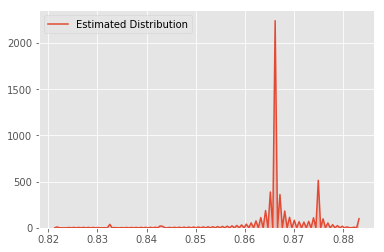

In [10]:
algorithm.match()

After the algorithm is done running, we will obtain some summary statistics

- the average match rate for all the matches, which in this case was .86
- the match rate for the top 5 matches
- the match rate for the bottom 5 matches
- the time it took for the algorithm to run
- a graph of the distribution of scores

A csv file titled data will be downloaded in the folder where this code is running. This contains the match information

<p><a name="Parameters"></a></p>
# Tuning Parameters
- <a href="#weights">Adjusting Weights</a><br>
- <a href="#cutoff">changing cutoff</a><br>
- <a href="#matches">pre-defined matches</a><br>

The above algorithm was run with parameters based on insights from regression analyses, however, these parameters can be tuned to the discretion of the user. 




Before running a new match, we must first reload the data into the matching algorithm


In [25]:
algorithm=BBGMatching.bbg(users_students_input1,users_prof_input1,matches_input1)

<p><a name="weights"></a></p>
### Matching Weights

The matching algorithm is based on default weights from regression analyses. However, these can be changed by the user

To see the default weights, type .coefficients() after the algorithm



In [26]:
algorithm.coefficients()

{'extro': 0,
 'ind_common': 0,
 'ind_common_extro': 0,
 'ind_common_intro': 0,
 'ind_common_stud': 0,
 'interc': 2.02397,
 'intro': -1.25207,
 'prof_experience_o': 0,
 'stud_exp_prof': 0.30732,
 'stud_experience_o': -0.6926,
 'tech_common': -1.25752,
 'tech_common_extro': 0,
 'tech_common_intro': 0,
 'tech_common_stud': 0.67054,
 'topic_common': 0,
 'topic_common_extro': 0,
 'topic_common_intro': 0.90907,
 'topic_common_stud': 0,
 'word_count': 0}


The coefficients above are the weights for the matching algorithm that will run. Zero's indicate features that the model suggests are not important.

These are a simplified description of what each weight means:
- Extro: The effect of a student being an extrovert
- ind_common: The effect of a student and mentor having a industry interest in common
- ind_common_extro: The effect when a extroverted student has an industry in common with their mentor
- ind_common_intro: The effect when a introverted student has an industry in common with their mentor
- ind_common_stud: The effect when a student who has experience in computer science has an industry in common with their mentor
- intercept: the intercept, please ignore
- intro: The effect when a student is an introvert
- prof_experience_o: the effect of having a mentor is more experienced in their industry
- stud_exp_prof: the effect when an experienced student is matched with an experienced mentor
- stud_experience_o: the effect when a student is more experienced in computer science
- tech_common: the effect of having a tech interest in common
- tech_common_extro: The effect when a extroverted student has an tech interest in common with their mentor
- tech_common_intro: The effect when a introverted student has a tech interest in common with their mentor
- tech_common_stud: The effect when a student who has experience in computer science has a tech interest in common with their mentor
- topic_common: the effect of having a topic interest in common
- topic_common_extro: The effect when a extroverted student has an topic interest in common with their mentor
- topic_common_intro: The effect when a introverted student has a topic interest in common with their mentor
- topic_common_stud: The effect when a student who has experience in computer science has a topic interest in common with their mentor

So say, for the next match, among other things, you really want to focus on students and mentors having topic interests in common. You can change the weight of having a topic interest in common in the algorithm

In [14]:
algorithm.coefficients(topic_common= .75938, extro=.1, prof_experience_o =-.3, ind_common=.21, word_count =.01)

{'extro': 0.1,
 'ind_common': 0.21,
 'ind_common_extro': 0,
 'ind_common_intro': 0,
 'ind_common_stud': 0,
 'interc': 2.02397,
 'intro': -1.25207,
 'prof_experience_o': -0.3,
 'stud_exp_prof': 0.30732,
 'stud_experience_o': -0.6926,
 'tech_common': -1.25752,
 'tech_common_extro': 0,
 'tech_common_intro': 0,
 'tech_common_stud': 0.67054,
 'topic_common': 0.75938,
 'topic_common_extro': 0,
 'topic_common_intro': 0.90907,
 'topic_common_stud': 0,
 'word_count': 0.01}

Above, I changed the weight of having a topic in common to the same as having a industry interest in common. Generally, I suggest if you change the weight of one variable, subtract the same amount from one or more other variables. You don't have to to this, but if you don't, the matching rate score will be inflated

Now run the algorithm again

**The new match will also be saved as data.csv. So if you ran previous algorithms, it will overwrite them. So please change the name of previous csv files if you don't want it overwritten**

matching has begun
matching returning students
matching students based on location
matching students based on region
almost done
matching is done!
----------------------------------------------------------------------------------------------------
the average match rate for all matches was :0.905911615031504
----------------------------------------------------------------------------------------------------
the top 5 matches were :
206    0.921680
133    0.925763
0      0.925763
160    0.927125
407    0.927798
Name: prob, dtype: float64
----------------------------------------------------------------------------------------------------
the bottom 5 matches were :
510    0.869260
270    0.871516
533    0.871516
277    0.871516
316    0.871516
Name: prob, dtype: float64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
time elapse: 82.829

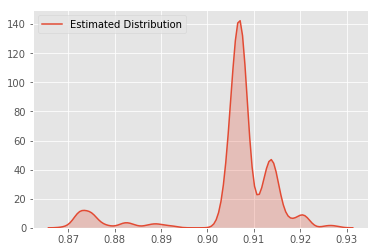

In [15]:
algorithm.match()

<p><a name="cutoff"></a></p>
### Changing cutoff

The second parameter to change is the cutoff. The algorithm matches each student sequentially after both the sequence of students and mentors is shuffled. With the default parameters, if a match between student and mentor exceeds .75, the algorithm will move on to the next match.  

*Note: to return to default parameters load the data into the algorithm again. In this case, I want to run with the default settings, so I reload the data*

In [29]:
algorithm=BBGMatching.bbg(users_students_input1,users_prof_input1,matches_input1)

matching has begun
matching returning students
matching students based on location
matching students based on region
almost done
matching is done!
----------------------------------------------------------------------------------------------------
the average match rate for all matches was :0.8642144345367534
----------------------------------------------------------------------------------------------------
the top 5 matches were :
28     0.883291
311    0.883291
407    0.883291
115    0.883291
32     0.883291
Name: prob, dtype: float64
----------------------------------------------------------------------------------------------------
the bottom 5 matches were :
475    0.821281
242    0.821281
246    0.821281
247    0.821281
96     0.821281
Name: prob, dtype: float64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
time elapse: 193.0

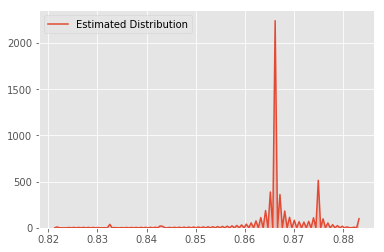

In [30]:
algorithm.match(cutoff=.85)

<p><a name="matches"></a></p>
### Pre-Defined Matches

The final parameter you can change is giving the algorithm pre-defined matches. If you have a list of matches you want to have, simply insert these matches into the algorithm, and the new matches will be produced given these pre-defined conditions

Insert a list of advisee IDs inside brackers and separated by commas into the advisee label. And in the same order and formate, insert the advisor IDs into the advisor label


In [31]:
algorithm=BBGMatching.bbg(users_students_input1,users_prof_input1,matches_input1)

matching has begun
matching returning students
matching students based on location
matching students based on region
almost done
matching is done!
----------------------------------------------------------------------------------------------------
the average match rate for all matches was :0.8637471331747931
----------------------------------------------------------------------------------------------------
the top 5 matches were :
233    0.883291
34     0.883291
57     0.883291
68     0.883291
110    0.883291
Name: prob, dtype: float64
----------------------------------------------------------------------------------------------------
the bottom 5 matches were :
0      0.750000
1      0.750000
2      0.750000
221    0.821281
436    0.821281
Name: prob, dtype: float64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
time elapse: 93.35

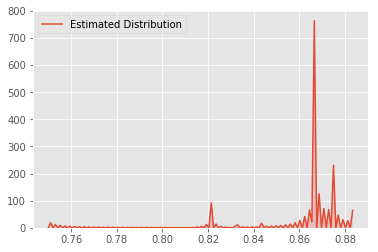

In [32]:
algorithm.match(advisee= [2698590, 2698590,2235203], advisor= [8457095, 7915205, 9028177])

All of these tuning parameters can be done in conjunction with one another.

As a rule of thumbs:

- increasing the cutoff will greatly increase the time it takes for the algorithm to run
- increasing weights while not decreasing other weights will vastly decrease time. Conversely, decreasing weights without increase the weights of other conditions will increase time
- pre-defined matches will only marginally increase time

<p><a name="matrix"></a></p>
### Table of All Matches

To create a table of all possible matches for each student, simply run the algorithm with .matrix() at the end. This will take at least an hour to run. But a matrix.csv file will be produced where a user can do some exploratory viewing of how a particular advisee and advisor will match




In [ ]:
algorithm=BBGMatching.bbg(users_students_input1,users_prof_input1,matches_input1)

In [ ]:
algorithm.matrix()

<p><a name="conclusion"></a></p>
### Conclusion

This is a matching algorithm that matches students on several conditions:
- advisee's are not matched with advisors from prior matches
- advisee's are not matched with advisors from the same company from prior matches
- advisee's are matched by location, then region
- session topics are assigned such that previous session topics for advisees are not repeated and preferred topic session topic of both advisee's and advisor's are considered

The matching algorithm aims to optimize the probability of an advisee scoring the session a 5. Criteria that the model uses to predict the session rating of a potential match are from the logistic regression. The default parameters are:
- introvert (negative effect)
- matching experienced students with experienced mentors (positive effect)
- student previous experience in coding (negative effect)
- tech interest in common (negative effect)
- students with more experience being matched to a mentor with a tech interest in common (positive effect)
- introverted students being matched to a mentor with a topic interest in common (positive effect)

The matching algorithm seeks to provide flexibility to the user to make matches according to what they feel might be important. This includes:
- The weights and direction of parameters can be changed
- The cutoff for what defines a "good" match can be adjusted
- Pre-defined matches can be set prior to the algorithm running

In closing, this matching algorithm attempts to optmize matches based on the probability of the session being rated a 5 by the advisee. This relies heavily on the results from the logistic regression; however, with a limited sample size, the findings that can be drawn from the analyses is limited. The power of the regression analyses grows in proportion with the growth of the data BBG gathers. So as BBG continues to refine their survey and collect more data, I hope this algorithm also grows in the insights it can deliver.

On a final note, there is random componenent to the optimization algorithm, so the results will not be the same every time it is run. Please keep that in mind!

